$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\text{i}}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$

In [1]:
from IPython.display import Image, display, YouTubeVideo, HTML, Video
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive, rcParams, animation
from ipywidgets import interact, FloatSlider, fixed, IntSlider
from scipy.constants import pi  # otherwise it's too annoying to type np.pi
interactive(True)
rcParams['figure.dpi'] = 150  # for crisper figures later

*Readings:*

* *Mostly these notes; the first 1/2 of it are classics, the second 1/2 are an adaptation of the beginning of Chapter 12 of Taylor, which is not a required textbook. Our librarian was able to make this chapter available on Quercus.*
* *Baker & Gollub is a whole textbook devoted to the topic of chaos, which we will introduce in the latter part of this document. You can use it as a side resource if you need more info about a particular topic.*
* **Note:** *I don't know where lecture 11 will end and lecture 12 will begin. Try to work on both as a whole.*

# Expectations

## Remember

* In non-linear oscillators, the frequency can depend on the amplitude.
* In non-linear oscillators, Fourier modes exchange energy.
* Fourier analysis helps, knowing the frequency content of a given oscillation (I do *not* request that you fully understand how it works)
* Waves can be non-linear too. Their speed can depend on the amplitude.
* Solitons are waves that never change shape, because their non-linear effects are compensated by dispersive effects.
* A damped-driven pendulum can develop non-linear oscillations for moderately strong driving, and chaos for stronger driving.

## Understand

Most of this lecture is qualitative, and its contents are fairly advanced. My expectations of you understanding the contents are more modest that for previous lectures.

## Apply

* Integrate numerically a non-linear oscillator equation. 
* Create a time series visualization.
* Create a phase-space trajectory (I will sometime plot the potential energy in the background; This is purely informational and aesthetic, and I am NOT requiring that you know how to do this).
* Interpret qualitative features of a non-linear solution (wave propagation as a function of amplitude, plotting the shape...).

Notice that I am not requesting anything about how to plot the Fourier coefficients like I will do.
This is again probably too advanced.

# Introduction

Most of what we have seen was about linear motions:  linear oscillations, linear damping, linear forcing, linear modes, linear waves.
Linear motions, in a way, all look the same.
We took mechanical examples as an excuse to study very generic phenomena that exist as soon as something has inertia and a restoring force.
In electronic circuits, inertial is provided by inductance and restoring is provided by capacitance, but they behave exactly the same way.
So, in a way, all the math and physics we have done are a series of invaluable building blocks to help us tackle many, if not all, sub-domains of physics and beyond.

When non-linearity is included however, things become trickier. There are a lot of non-linear phenomena, and while there are some universal elements to it, there is also a lot of diversity.
At our level, we still have too few tools to tackle these systems with pen-and-paper (and to be fair, those often only get you so far), but we have learned a lot about visualizing complex phenomena.
So, we will use these tools a lot to visualize complex phenomena, and leave the detailed math for when you grow up.

In this section, we review a few of the most famous undriven, nonlinear waves and oscillations.

# Non-linear pendulum

## General behaviour

We know this one, its equation of motion is 
$$\ddot \theta + \omega_0^2\sin\theta = 0,$$
with the caveat that $\omega_0$ is the angular frequency of oscillations only in the weak-amplitude (linear) limit.
We also saw that it had a neat expression for the period of oscillation, namely,
\begin{equation}
    T = \frac{2\sqrt{2}}{\omega_0} \int_0^{\Theta}\frac{\di \theta}{\sqrt{\cos\theta - \cos\Theta}},
    \label{eq:TNL}
\end{equation}
where $\Theta$ (capital $\theta$) is the maximum angle of oscillation, assuming it is not undergoing rolling motion.
We can find this expression based on conservation of energy (see lecture 6).

Its energy (shades) and possible bound trajectories (red lines) are shown below.

In [2]:
ftsz = 12  # font size
m = 1.0  # [kg] mass
g = 9.8  # [m/s2] gravity
l = 1.0  # [m] pendulum length
omega0 = (g/l)**.5

In [3]:
# theta and dottheta values
th = np.linspace(-pi, pi, 500)
dotth = (g/l)**0.5*np.linspace(-2.5, 2.5, 500)

[thg, dotthg] = np.meshgrid(th, dotth)  # gridded values
# U = m*g*l*(1-np.cos(th))  # for PE vs theta plot
Eg = 0.5*m*l**2*dotthg**2 + m*g*l*(1-np.cos(thg))  # for contouring
    
def E_pendulum_phaseplot():
    plt.figure(figsize=(5, 4))
    plt.contourf(thg/pi, dotthg, Eg/(m*g*l), 32)  # plot contours
    plt.colorbar(orientation='horizontal')  # add colorbar
    # red contour overlay for phase trajectories
    plt.contour(thg/pi, dotthg, Eg/(m*g*l),
                np.linspace(0.1, 2, 6), colors='r')
    plt.xlim([th[0]/pi, th[-1]/pi])
    plt.ylim([dotth[0], dotth[-1]])
    plt.grid('on')
    plt.title(r'$E/(mg\ell)$ in phase space')
    plt.xlabel(r'$\theta/\pi$')
    plt.ylabel(r'$\dot\theta$ [rad/s]')

    plt.tight_layout()
    return


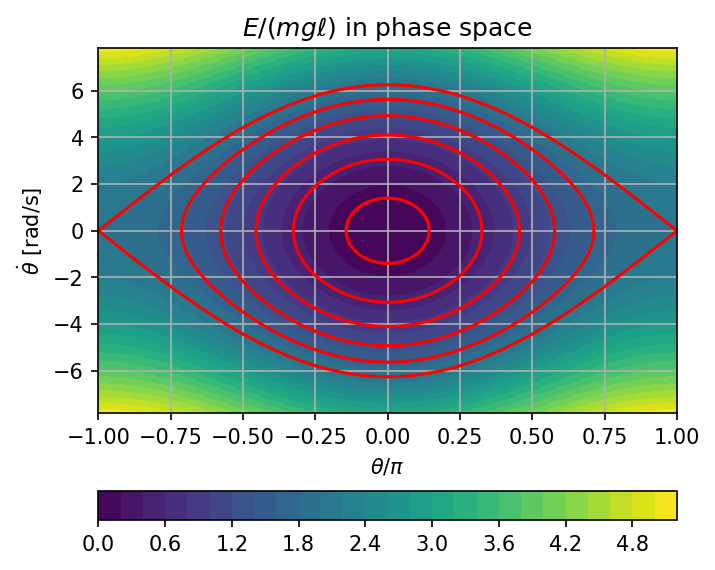

In [4]:
E_pendulum_phaseplot()

So, at low energy (near the bottom of the well), we have SHM (cute little ellipses), and as the energy or equivalently $\Theta$ increase, the trajectories in phase space get more distorted.
Let's see how this distorsion is reflected in the time series.

There is no easy analytical expression for $\theta$ in the general case, so instead, we will use the Euler-Cromer method.

In [5]:
def ddtheta(theta, omega0):
    """ Second time derivative of theta """
    return -omega0**2*np.sin(theta)

Theta = -0.5*pi  # [rad] maximum angle

In [6]:
from scipy.special import ellipk
T = 4*ellipk(np.sin(Theta/2)**2)/omega0  # Total cheat! I am not computing the integral
# See https://en.wikipedia.org/wiki/Pendulum_(mathematics)#Arbitrary-amplitude_period
print("Period is T = {} s".format(T))

Period is T = 2.369049722175345 s


In [7]:
# Weakly non-linear pendulum
ntT = 500  # number of time steps per period
nT = 3.  # number of periods
dt = T/ntT  # duration of one time step
time = np.arange(0., T*nT, dt)  # time array
nt = len(time)  # total number of iterations

In [8]:
# Initialize theta, dtheta/dt
theta = 0*time
dottheta = 0*time

# Set first element of theta and dottheta to initial conditions.
theta[0] = Theta
dottheta[0] = 0.0

# generate theta and dottheta with the Euler-Cromer method
for i in range(nt-1):
    dottheta[i+1] = dottheta[i] + dt*ddtheta(theta[i], omega0)  # update dottheta
    theta[i+1] = theta[i] + dottheta[i+1]*dt  # use updated dottheta

In [9]:
def plot_TS(t, T, th, dth):
    """ draw time series; th is theta, dth is dtheta/dt"""
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t/T, th/pi)
    plt.ylabel(r'$\theta/\pi$')
    plt.xlabel(r'$t/T$')
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.plot(t/T, dth)
    plt.ylabel(r'$\dot\theta$ [rad/s]')
    plt.xlabel(r'$t/T$')
    plt.grid()

    plt.show()
    
    return

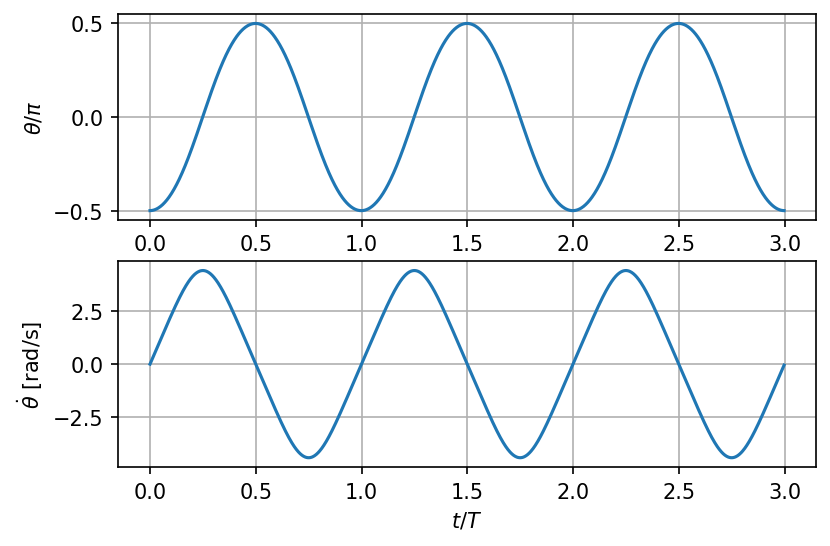

In [10]:
plot_TS(time, T, theta, dottheta)

So, as expected, the pendulum oscillates with period $T$, but the oscillations aren't quite sinusoidal.
On the $\theta$ curve, the sine function look a little squeezed, though it's not super obvious.
The $\dot\theta$ curve is more notably a-sinusoidal, with flatter slopes and pointier tops.
How can we visualize this better?
First, try a phase plot.

In [11]:
def plot_phase(th, T, dth):
    """ draw phase plot; th is theta, dth is dtheta/dt"""
    plt.figure(2)
    plt.plot(th/pi, dth, '.', markersize=0.5)
    # plt.scatter(th/pi, dth, c=time, s=0.25, alpha=0.5)
    plt.ylabel(r'$\dot\theta$ [rad/s]')
    plt.xlabel(r'$\theta/\pi$')
    plt.grid()
    # plt.axis(xmin=-1, xmax=1)
    plt.show()
    return

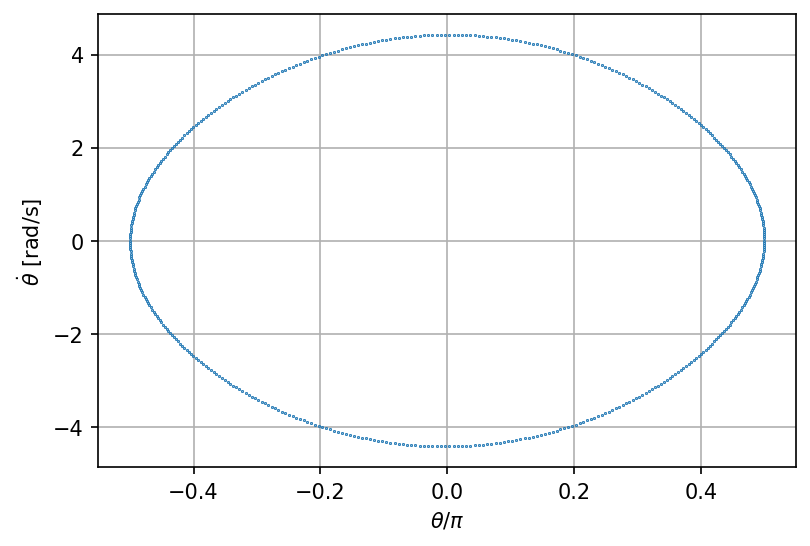

In [12]:
plot_phase(theta, T, dottheta)

The phase plot looks a little more diamond-like, indicating that the nice ellipses of SHM are gone.

## Fourier analysis

We saw in lecture 9 that there is a tool to analyse periodic signals: the Fourier series.
It isn't clear at this point what nail this hammer will find, i.e., what question, we are looking to answer, but let's try anyway.
Let's find the coefficients $A_n$ and $B_n$ such that
$$ \theta(t) = \frac{A_0}2 + \sum_{n=1}^\infty\left[A_n \cos\left(\frac{2n\pi t}{T}\right) + B_n \sin\left(\frac{2n\pi t}{T}\right)\right].$$
In fact, we can see on the plot that $\theta$ is an even function (any initial condition with zero velocity is; any initial condition with zero position and non-zero velocity would be and odd function), so we can drop the $B_n$'s right away and focus on the $A_n$'s:
$$A_n = \frac2T\int_{0}^{T}\theta(t)\cos\left(\frac{2n\pi t}{T}\right)\di t.$$

*Note: As I warned in lecture 9, the notations are a bit different from then because in lecture 9, I was assuming that the function had period $2L$.*

We don't know the expression for $\theta$ (that's the idea: if we knew it, we wouldn't try so many different ways to visualize it), so we need to compute them numerically.
Because we computed $\theta$ for a duration of three periods, we can simply integrate over the whole interval and divide by three (and we will be a smidge more accurate).

I will compute the first few $A_n$'s by explicitely computing the integral with the trapezoidal method, but I will also use an uber-classical algorithm to compute the coefficients, the Fast Fourier Transform (FFT), just to show that it computes the same thing (I will not time it, but it does compute all coefficients much faster than the pedestrian integration).

***

*A few words to understand how I use the `rfft` routine below, although you are not expected to understand how or why it works. If are just willing to believe me when I say that twice the output of the `rfft` is equivalent to (in fact, better than, because the routine designed by pros) computing the $A_n$'s and $B_n$'s above, then you can skip this part.*

*The FFT algorithm computes the complex version of a Fourier series. That is, at each point $t_k$ in the time series, with $k = 0$, $1$, ..., $K-1$, with $K$ the total number of points in the time array, the value $\theta_k = \theta(t_k)$ is given by*
$$\theta_k = \sum_{n=0}^{K-1}a_n\exp\left(\frac{2\pi\cplxi n t_k}{T}\right),$$
*with $a_n$ the complex Fourier coefficient for each mode.*
*Note that there are as many modes as there are grid points ($K$): that's because we are back to a discrete system, and the number of modes is not infinite anymore.*

*The complex Fourier coefficients are given by*
$$a_n = \frac{1}{K}\sum_{k=0}^K\theta_k\exp\left(-\frac{2\pi\cplxi n t_k}T\right),$$
*which is the discrete equivalent of the integrals for $A_n$ and $B_n$. In fact, a formula sheet about Fourier series (e.g., https://en.wikipedia.org/wiki/Fourier_series#Definition) would tell you that $a_n = (A_n - \cplxi B_n)/2$. So, for our even function $\theta$ for which $B_n\equiv 0$, $A_n = 2a_n$. It is almost what is coded below, except that the FFT algorithm works with complex numbers, and real numbers are treated as complex numbers with a zero imaginary part (for example, when the FFT implementation wants to output what we would call the number 2, it would really output `2+0j`), and Matplotlib doesn't plot complex numbers, even if the imaginary part is zero. It does plot the real part automatically, but it complains about it, so, we take the real part of the $a_n$'s to quench any discontent.*

*In general, the function we compute the Fourier series of can be complex. But because the $\theta_k$'s are real, there is a symmetry in the $a_n$'s, namely that $a_n = a_{K-n}^*$, and the `rfft` uses that property to only compute half the modes, which is faster.*
***

In [48]:
from numpy.fft import rfft  # the FFT for real entries
Nmodes = 10  # we compute the first 10 modes with the pedestrian method
An = np.empty(Nmodes)
for n in range(Nmodes):
    An[n] = np.trapz(theta*np.cos(2*n*pi*time/T), time)*2/T/nT

an = rfft(theta[:ntT], norm="forward")
# "forward" means that the Fourier coefficients are normalized, which is
# how I have written them in the lecture notes 

In [49]:
def plot_Fourier():
    plt.plot(An, 'o', label='$A_n$')
    plt.plot(2*np.real(an), '+', label=r'$2$Re$(a_n)$')
    plt.plot(2*np.imag(an), 'x', label=r'$2$Im$(a_n)$')
    plt.xlim(0., Nmodes)
    plt.xlabel('mode number')
    plt.ylabel('Fourier coefficient')
    plt.legend()
    plt.grid()

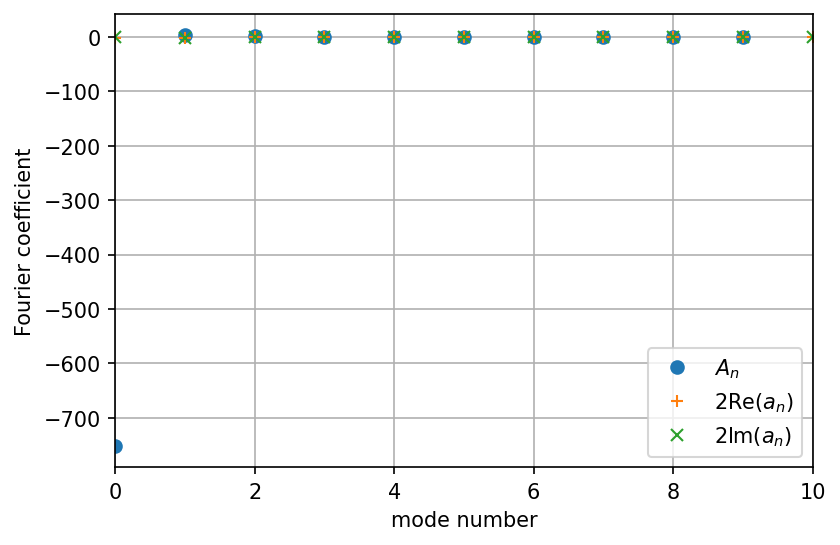

In [50]:
plot_Fourier()

Above, the dashed line gives the same result as the solid blue line: a dominant mode-1 (i.e., an oscillation of frequency $1/T$), and we have confirmed, or illustrated, that the `rfft` routine does the work of the integrals for the $A_n$'s.

But there is more: the mode-3 (frequency $3/T$) seems to show some activity, and there might be more.
So, there seems to be valuable information in the weaker modes, because that's where the deviation from linearity seems to exists.
We can't prove at this point, but at at the very least, we should find a way to plot it better.

This problem is actually very common in nonlinear systems: the higher harmonics are where it's at, even though they are weaker.
One common solution is to plot spectra on a semi-log scale, i.e., to plot the $|A_n|$'s in log-scale.

In [51]:
def plot_semilog():
    plt.semilogy(abs(An), 'o-', label='$|A_n|$')
    plt.semilogy(2*abs(an), '+--', label=r'$2|a_n|$')
    plt.xlim(0., Nmodes)
    # plt.ylim(1e-15, 1e1)
    plt.xlabel('mode number')
    plt.ylabel('Fourier coefficient')
    plt.legend()
    plt.grid()

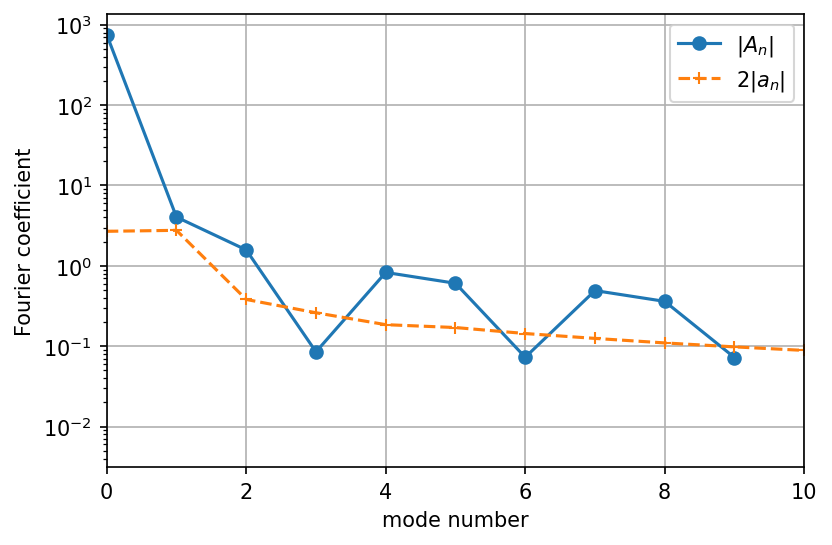

In [52]:
plot_semilog()

The two methods agree when there is a strong signal, but when the modal amplitude is weak, the `rfft` method gives less amplitude. As the mode number goes up, the `rfft` method still shows harmonics, while the "pedestrian" method gives a background amplitude that is too high to distinguish any harmonic past the 7th harmonic.

Which method is more trustworthy? As of the time I am writing these notes, I have to definite proof, but I know that:

* The `rfft` method is a tried-and-tested method, while my way to integrate was done a bit naively, it was the first thing to try, and I did;
* These higher harmonics at $n=7$, $9$, and probably higher, are a real thing;
* If you try to increase `ntT` (the number of points per oscillation period), you will see the even coefficients's magnitudes decrease in both methods, but more so in my own method. This indicates that my method might not be as precise as `rfft`.

For these reasons, I trust the `rfft` method more than my own, and will use it from now on.

And what about the physics? We do see that the first harmonic dominates indeed, highlighting the fact that most of the energy is in the sinusoidal oscillation of period $T$.
But there is more than just harmonic: every odd mode has some energy in it, and the amplitudes decay by what appears to be a constant factor each time: $|A_{n+2}| = \rho|A_n|$, with $\rho <1$.
We can't know for sure if $\gamma$ is constant except for this anecdotal piece of evidence, not without more work anyway, but the fact is that there is more than one harmonic.

Can we know for sure that the existence of these harmonics is due to non-linear effects?
After all, when we plucket a string, we had many harmonics superposing, and the dynamics were linear.
One test you can do is take the code above and increase the degree of nonlinearity: try successively the values $\Theta = \pi/4$, $\pi/2$, $2\pi/3$, $3\pi/4$, $0.99\pi$... You should see the harmonics grow in importance, and this increment $\rho$ become larger and closer to one.

But we can also do a bit of elementary math to show that it is indeed the case for weakly non-linear oscillations, and therefore *a fortiori* for strongly non-linear ones.

## Weakly nonlinear pendulum

For small-but-not-too-small angles, we can expand the times series for the sine to two orders, i.e., $\sin \theta \approx \theta - \theta^3/3!$, and the ODE becomes
\begin{equation}
    \ddot \theta + \omega_0^2 \dot \theta = - \frac{\omega_0^2}{6}\theta^3,
    \label{eq:weakNLpendulum}
\end{equation}
with the non-linear term purposely left on the RHS to make it look as if it is forcing the SHO.

What is the frequency of that "forcing"?
Let's make a first guess and assume that the whole thing oscillates at $\omega =2\pi/T$, but that it does so sinusoidally, which isn't too bad an assumption in the weakly non-linear case.
That is, $\theta \approx \Theta\cos(\omega t)$.
In that case, the non-linear forcing is proportional to $\cos^3\omega t$, which is
\begin{align*}
    \cos^3 \omega t & = \left(\frac{\eexp{\cplxi\omega t} + \eexp{-\cplxi \omega t}}{2}\right)^3 \\
                    & = \frac18\left(\eexp{3\cplxi\omega t} + 3\eexp{\cplxi\omega t} + 3\eexp{-\cplxi\omega t}+e^{3\cplxi\omega t}\right)\\
                    & = \frac{\cos(3\omega t) + 3\cos(\omega t)}4.
\end{align*}

So, it's like the non-linear term takes in that signal at $\omega$, and turns it in part into a forcing, oscillating at $3\omega$.
Recall that in the spectrum, we saw the frequencies $\omega$ and $3\omega$ first.
This forcing is weak: its pre-factor is $\Theta^3/6$, which is much smaller than the "primary"  amplitude $\Theta$ if the non-linearity is weak ($\Theta \ll 1$), but it is there.

Now, the LHS of equation \eqref{eq:weakNLpendulum} responds to this forcing and develops an oscillation at $3\omega$.
A more accurate signal should then be $\theta \approx A_1\cos\omega t + A_3 \cos(3\omega t)$.
But if you plug it back into the non-linear term $\omega^2\theta^3/6$, you will create more frequencies! Only frequencies that are odd though, which you can check by cubing the new $\theta$[^2].
So, you create $5\omega$, $7\omega$, and so on, just like we saw on the spectra above.
But each time, this non-linear forcing is weaker, and the harmonics aren't as strong.

This is true for weak non-linearity, but it must also be true for strong non-linearity.
Indeed, as you add up more and more corrections in the Taylor expansion ($\sin\theta \approx \theta - \theta^3/3! + \theta^5/5! - \theta^7/7!\dots$), you can only create more and more occasions to create more and more frequencies.

This is one fundamental feature of non-linear systems: **modes exchange energy**. 
We still have relations like $E = \sum_{n=1}^\infty E_n$ as for linearly coupled oscillators or waves, but in the linear case, we always had expressions of the type $E_n\propto m\omega_n^2 A_n^2$, where $\omega_n$ and $A_n$ did not depend on what was going on in the other modes.
Here, the big difference are that the frequencies depend on the amplitude via equation \eqref{eq:TNL}, the $A_n$'s are not just proportional to $\Theta$ anymore, and as a consequence," the $E_n$'s are not independent from one another. The amount of energy in each mode depends on how much energy there is in the other modes.
For example, in our pendulum, how big $\Theta^3$ was would influence how big $\rho$ (the one from $|A_{n+2}|  =\rho|A_n|$) was.

[^2]: it is informative to do this sort of exercise once in your life. To do it a second time would be somewhat silly.

# Non-linear waves

Waves can also become nonlinear. In fact, before you took any physics class, and probably still today depending on your state of mind, the word "wave" probably evoked large overturning rolls on a beach, and maybe a surfer or two on it.
Waves like those are as non-linear as it gets, and very far from a good ol' sinusoidal motion.

Their mathematical description is excruciatingly complicated at our level, so we will stick to a qualitative description of a few famous results.

## The Fermi-Pasta-Ulam-Tsingou (FPUT) experiment

*This famous historical experiment was formerly called the "Fermi-Pasta-Ulam" experiment, until calls to rename the experiment were made in 2008. Tsingou was a programmer, whose gender I will let you guess.*

Waves, like simple oscillations, are subjected to the same effects as simple oscillations: a non-linear superposition of waves will lead to interactions between them, energy exchanges, and unpredictable behaviour.
In many cases, the dynamics becomes a mess: the system is expected to "thermalize", i.e., if the energy is initialized in a given mode with some coupling between the modes, and if one waits long enough, non-linear effects should spread the energy in all the modes.

This was a thought experiment until the advent of computers.
In the 1950's, FPU & T decided to test their brand-new computer, the Mathematical Analyzer Numerical Integrator and Automatic Computer Model I (MANIAC I), located in what I imagine was an entire room at the Los Alamos Scientific Laboratory.
They needed a really hard problem, and they settled on computing the motion of a chain of masses, coupled by springs, with one simulation including a quadratic non-linearity, and the other a cubic non-linearity.
And because they really wanted to make a splash, they decided to couple a whopping 64 masses together (imagine that!).

This is widely considered to be the very first numerical simulation ever. Before, computers were used to compute numbers, output the results of complicated formulas, for artillery calculations for example. This on the other hand was the first time, scientists asked the question: "What if I asked a computer to give me the solution to a problem whose outcome I cannot predict?"

So, the simulation with the quadratic non-linearity solved the system of equations
\begin{equation}
    \ddot y_n = y_{n+1} - 2y_n + y_{n-1} + \alpha\left[(y_{n+1} - y_n)^2 + (y_n-y_{n-1})^2\right],
    \label{eq:FPUTquadratic}
\end{equation}
with $\alpha$ a small number controlling the degree of non-linearity, and the experiment with the cubic non-linearity was solved for 
$$\ddot y_n = y_{n+1} - 2y_n + y_{n-1} + \beta\left[(y_{n+1} - y_n)^3 + (y_n-y_{n-1})^3\right],$$
with $\beta$ also controlling the degree of non-linearity.

I have never tried coding this experiment, and there are repos online where you will find Python implementations of it. I suspect that it isn't hard, but I will simply show you the output, taken directly from Wikipedia (https://commons.wikimedia.org/wiki/File:Fermi%E2%80%93Pasta%E2%80%93Ulam%E2%80%93Tsingou_recurrence.gif; Author: Jacopo Bertolotti, CC0, via Wikimedia Commons).

![](Fermi–Pasta–Ulam–Tsingou_recurrence.gif)

So, here you clearly see the difference between linear and non-linear: in the linear case, the energy stays in the first harmonic, while in the non-linear case, the energy spreads to other modes.

But what was really surprising was that the energy just didn't stay in these modes, or didn't keep moving from mode to mode somewhat unpredictably: periodically, the energy would gather back into the first harmonic, and the cycle would repeat.

Another surprising thing was the propagating structures that would develop a little bit after the simulation started: the oscillation would become asymmetric, and would look like a steep front, followed by a long tail.
And a little bit after that, secondary bumps would develop.

It took about a decade before people made headways into understanding this problem.
First, Kruskal & Zabusky made the connection with the Korteweg-de Vries equation, which was famous for surface water waves and had been solved in the late 1890's.
Then, the number of "sub-bumps" and their amplitude was solved entirely by Miura in 1968.
These bumps were then called "solitons", because in an infinite domain, they would propagate as isolated bumps, like a wavelength who got separated from the others.

## Surface Water solitons

Essentially, a soliton is the result of two competing effects: nonlinear effects and wave dispersion. These effects are in general completely different from one another, and that there are situations in which they can perfectly balance is one of the many "miracles" of non-linear science.
Let's see how it happens for surface water waves, first with a couple of movies (https://youtu.be/hfc3IL9gAts and https://youtu.be/w-oDnvbV8mY).

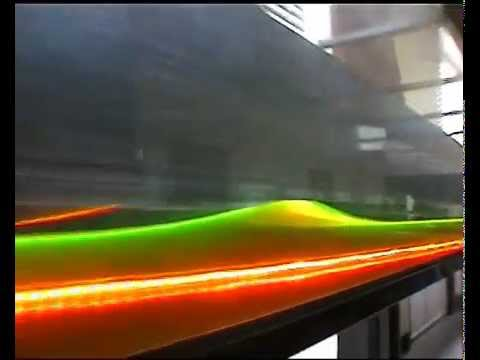

In [83]:
YouTubeVideo('hfc3IL9gAts')

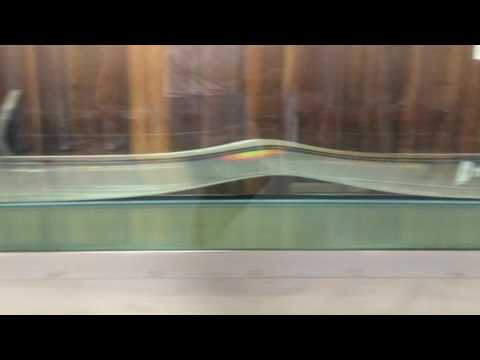

In [84]:
YouTubeVideo('w-oDnvbV8mY')

You have probably seen those yourself, because they happen very frequently on shallow beaches (you just need to know what you're looking for).
I showed a picture that I took myself during the first lecture, see below for a reminder and a few more.

![](020_P1020338.jpg)

![](016_Solitons.jpg)

There are also a few pretty pictures on this Wikipedia page: https://en.wikipedia.org/wiki/Cnoidal_wave

We don't really see "sub-bumps" in those pictures.
Below is a picture, taken by the Japanese satellite HIMAWARI-8, revealing propagation patterns of sub-surface waves that show this ordered ranking of "sub-solitons".

![](ISHIM8.png)

Below is a video I did myself a long time ago (Hornetal.mp4), that shows this kind of wave between two layers of water of different densities.

It is remarkable how those waves are similar to some of the oscillations FPUT saw.

In [85]:
Video("Hornetal.mp4")

If one were to apply a continuum approximation to equation \eqref{eq:FPUTquadratic} (cf. https://en.wikipedia.org/wiki/Fermi–Pasta–Ulam–Tsingou_problem#Connection_to_the_KdV_equation for a summary of the derivation), one would end up with the Korteweg-de Vries (KdV) equation.
In its canonical form, it is not obvious which term does what, so instead, I will write the form it takes for long surface gravity waves on a fluid of depth $h$.
It is valid when the waves are 

* weakly non-linear (which happens when the surface elevation $y$ is much less than the depth $h$, while not vanishingly small), and
* when the waves are weakly dispersive. Very long waves ($\lambda \gg h$, such as tsunamis or swell) are non-dispersive, their phase speed is $v=\sqrt{gh}$. But when the wavelength is much longer than the depth, but not infinitely longer, then weak dispersion sets in. Like in tutorial 10 for deep-water gravity waves, longer waves propagate (a little) faster than shorter waves.

For such waves, the KdV equation reads
$$\underbrace{\frac{1}{v}\pde{y}t + \pde{y}x}_{\text{linear, non-disp.}} + \underbrace{\frac{3}{2h}y\pde{y}x}_{\text{non-lin.}} + \underbrace{\frac{h^6}6\pden3yx}_{\text{disp.}} = 0.$$

Oof! I just wrote it because it is kind of famous, not for you to remember or even understand how it works by looking at it. But we can see that there is:

* a linear, non-dispersive propagation operator. It only works for rightward-propagating waves; any function that can be written $y(x-vt)$ will satisfy it, but not $y(x+vt)$.
* a non-linear term $(3/2h)y\pdel yx$, and
* a dispersive term $(h^6/6)\partial^3_x y$. As mentioned above, it makes longer waves travel faster than shorter waves. Don't worry if you can't see it on the equation: no-one can. People know it because they've stared at this equation and its solutions for much longer than we have.

What follows is a usual, hand-wavy explanation of the phenomenology of these waves.
The explanation is super-dodgy, very unrigorous, has a lot of holes, but it does says what each term does, qualitatively. Anything more rigorous would have me fill pages and pages of calculations.

* The linear, non-dispersive phase speed is $\sqrt{gh}$, meaning that a wave over a deeper ocean travels faster than a wave over a deeper ocean. So, at the crest of the wave, the water is locally deeper, and therefore the crest travels faster than the rest of the wave: it steepens. Note that the KdV equation without the dispersive term is called Burger's equation, and it is *the* equation that models shock waves. This behaviour is why waves on a beach overturn: because the depth keeps decreasing as a wave approaches a short, the non-linearity keeps increasing, and the front of the wave becomes so steep that it overturns.
* But then as the wave steepens, the back of the wave becomes longer, and the front of the wave becomes shorter. Dispersion kicks in, the longer back-of-the-wave now travels a bit faster and catches up with the shorter front-of-the-wave, which now travels more slowly.

In the end, if the conditions are right, some sort of competitive equilibrium establishes itself.
Below is my modest attempt to sketch what is going on.
It is upside-down because when I created it, I was then trying to explain the red-and-blue simulation I showed earlier, which had the crests pointing down.
It works the same for surface waves, only with crests pointing up.
Do not attempt to understand this behaviour beyond this qualitative description!

![My own qualitative explanation of how water solitons form](KdV_behavior.pdf)

This equation has all sorts of solutions, but the soliton solution is
$$y(x, t) = \frac{y_0}{\cosh^2\left\{\frac{\sqrt{3y_0/h}}{2h}\left[x-V(y_0)t\right]\right\}}, \with V(y_0) = \left(1+\frac{y_0}{2h}\right)v,$$
where $y_0$ is the height of the bump.
Again, it is a bit too intense to tackle head on, but let me point out two notable facts:

* the general shape of this solution is plotted below. It does look like the pictures.
* the velocity is $V(y_0)$, and it depends on the height of the bump. Similarly to the period depending on the amplitude of the non-linear pendulum, the speed of a non-linear wave depends on its amplitude. In this case, a taller wave travels faster than a shorter wave.

![](sech2.png)

And who knows, you may see this wave sooner than you think: https://www.physics.utoronto.ca/~phy326/sol/

I will conclude about this class of dispersive-nonlinear waves by mentioning what is arguably (and subjectively) their most spectacular family member: the **Morning Glory cloud**. The most famous happens in northern Australia, but it has been observed over Canada, and I have a suspicion  that my neighbour filmed a small one last year from her balcony (https://vimeo.com/456635595 at around 15s).

In [113]:
%%html
<div style="padding:56.25% 0 0 0;position:relative;"><iframe src="https://player.vimeo.com/video/456635595?badge=0&amp;autopause=0&amp;player_id=0&amp;app_id=58479" frameborder="0" allow="autoplay; fullscreen; picture-in-picture" allowfullscreen style="position:absolute;top:0;left:0;width:100%;height:100%;" title="Summer Storm (Toronto, ON)"></iframe></div><script src="https://player.vimeo.com/api/player.js"></script>

## Nonlinear Schrödinger equation (NLSE)

Just a few words on this one: even though looking up "solitons" online will mostly bring up pictures of waves on water, the class of solitons that are solution of the NLSE are actually the most studied. One of the big explanations are the engineering applications: optical fibers are very dispersive media. Any linear signal sent through them would end up being completely distorted after some time. That's why it is actually non-linear waves that are being sent, in the form of tiny solitons, one after the other.
Because solitons don't change shape ever, the information remains perfectly intact over any propagation distance.
These solitons also occur in plasmas, Bose-Einstein condensates, all sorts of condensed-matter systems, and they have been investigated as a possible explanation for rogue vagues in the ocean.

They look different than KdV solitons: the envelope is the soliton and it can also be a $1/\cosh^2$ function, but the phase propagates inside, see below.
Unlike KdV solitons, NLS solitons are *strongly-dispersive* solitons.
I tried to find prettier pictures, but they just aren't as pretty. I will let you do this search for yourselves.

![Kraaiennest, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons](Sech_soliton.png)

## Torsional solitons

OK, one last one.
Remember the Klein-Gordon equation of homework 5? Of course you do, it was due today.
A chain of pendulums was coupled together by torsional springs, and after linearization, you had found the Klein-Gordon equation.

Well, let's not linearize, not even a little: the equation
$$\pden{2}{\theta}x - \frac{1}{v^2}\pden2{\theta}t = k_0^2\sin\theta$$
is called the "sine-Gordon" equation, as a nod and a wink to the Klein-Gordon equation.
And it does have soliton solutions!
To create one, take one end of the chain, give it a rotation angle of $2\pi$, i.e., flip the pendulum there completely on itself: the next pendulum swings by $2\pi$ with a delay, and the next, and the next... The rotation propagates like a wave, and that wave never changes shape.

Videos are surprisingly hard to come by. The Wikipedia page (https://en.wikipedia.org/wiki/Sine-Gordon_equation) has a few examples, and I like the one below (https://vimeo.com/35462854).

In [114]:
%%html
<iframe src="https://player.vimeo.com/video/35462854" width="640" height="480" frameborder="0" allow="autoplay; fullscreen; picture-in-picture" allowfullscreen></iframe>
<p><a href="https://vimeo.com/35462854">Solitons - kink and anti-kink collisions</a> from <a href="https://vimeo.com/kangaroo3d">Daniel Piker</a> on <a href="https://vimeo.com">Vimeo</a>.</p>

The soliton solutions (one for each direction of propagation, also called kink and anti-kink) to this equation are
$$\theta = 4\arctan\left(\eexp{\pm \gamma s}\right), \with s = k_0\left(x-vt\right),\quad \gamma = \frac1{\sqrt{1-\beta^2}} \andeq \beta = \frac{v}{v_0}.$$
The speed $v$ is constant in this equation and if you recall, $v_0 = \omega_0/k_0$.

If those equations remind you of the Lorentz transform in special relativity, that's because it should: this chain of pendulums does work a little like the equations of SR.
Here, the soliton travels at speed $v$, which depends on how fast (i.e., non-linearly) the rotation happens, via the parameter $\gamma$.
I plot two versions below, one for $\beta=0.1$ (slow rotation) and one for $\beta=0.99$ (rotation so fast, the disturbance propagates at almost the maximum velocity $v_0$).

In [115]:
def s(t, x, v, k0):
    return k0*(x - v*t)


def theta(gamma, sval):
    return 4*np.arctan(np.exp(-gamma*sval))/pi


def gamma(beta):
    return 1/np.sqrt(1-beta**2)
    

L = 200
x = np.linspace(0., L, 256)
v0 = 10.
k0 = omega0/v0
v1 = 0.1*v0  # first experiment
v2 = 0.99*v0  # second experiment

linestyles = ['-', '--', '-.', ':']

In [116]:
def plot_kinks():
    for ii, time in enumerate([-10., 0., 10., 20.]):
        plt.plot(x, theta(gamma(v1/v0), s(time, x, v1, k0)),
                 'b', linestyle=linestyles[ii],
                 label=r'$\beta = {0:.1f}$, $t = {1}$'.format(v1/v0, time))
        plt.plot(x, theta(gamma(v2/v0), s(time, x, v2, k0)),
                 'r', linestyle=linestyles[ii],
                 label=r'$\beta = {0:.1f}$, $t = {1}$'.format(v2/v0, time))

    plt.grid()
    plt.xlabel('$x$')
    plt.ylabel(r'$\theta/\pi$')
    plt.legend()
    plt.show()
    
    return

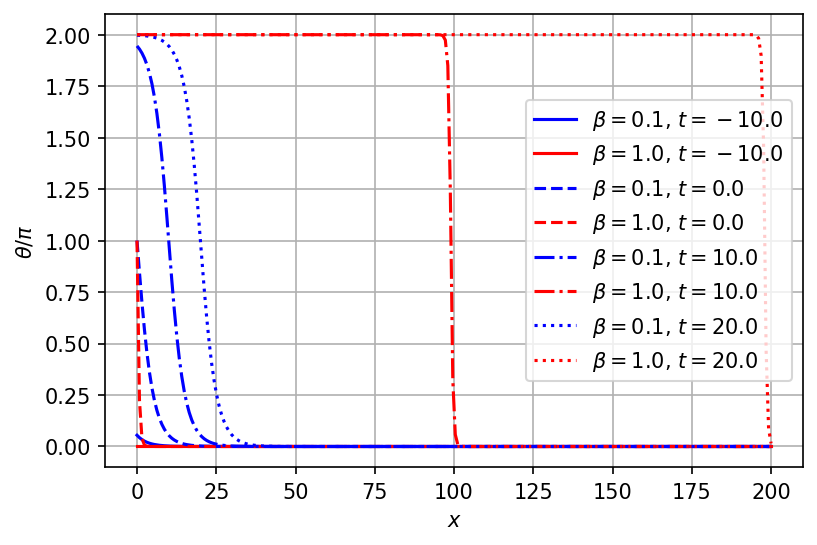

In [117]:
plot_kinks()

Above, we see that the red curves, for which we flipped the pendulum faster, propagate faster, their slope is steeper. In other words, their width is proportional to $\gamma^{-1}$ (length contraction).

# The damped, driven pendulum (DDP)

The non-linear oscillations I just showed were all well-behaved, in a way: we had solutions with closed expressions, and their form was predictable over time.
Often with non-linear systems though, predictability is not guaranteed, and we often encounter what physicists call "chaos". We will talk more about it in the next lecture, but in the mean time, let's study the simplest system, one could think of, that exhibits chaos.

That is, let's go back to our non-linear pendulum, and tweak it so that it is now (lightly) damped and driven at angular frequency $\omega_d$ (NOT the damped pseudo-frequency of lecture 4; I am redefining $\omega_d$ to be the driving frequency, because I will need to keep $\omega$ as a free variable).
The equation of motion becomes for the damped, driven (DDP) pendulum becomes
$$\ddot \theta + 2\gamma \dot \theta + \omega_0^2\sin\theta = \omega_0^2 \beta \cos(\omega_d t),$$
with $\beta$ some measure of how hard we drive it.

Before analyzing this system further, let's code it up and see what it does.
I will use the notation $T_d = 2\pi/\omega_d$ for the driving period.

In a first time, I will plot three types of plots:

* regular time series, $\theta/pi$ as a function of $t/T_d$,
* $(\theta/\pi, \dot \theta/(\pi\omega_d))$ phase plots (phase trajectories in red, potential energy in faint shades),
* $\theta_n(\omega)$ spectra.

In [118]:
omegad = 2*omega0/3  # driving frequency
Td = 2*pi/omegad  # driving period
gamma = omega0/4  # damping
ntTd = 500  # number of time steps per driving period

In [119]:
dt = Td/ntTd  # time step
num_cycles = 40  # number of dirving periods
t_end = num_cycles*Td  # final time
nt = ntTd*num_cycles  # number of time steps

time = np.arange(0., t_end, dt)  # initialize the time array

In [120]:
theta0 = -pi/2  # initial angle
dottheta0 = 0.0  # initial angular velocity

In [121]:
# function that returns theta acceleration accounting for gravity, forcing, damping
def ddtheta_ddp(th, dth, wd, w0, g, t, b):
    """ returns theta acceleration accounting for natural frequency w0, 
    forcing frequency w and amplitude b, damping g, system state th and dth """
    return -w0**2 * np.sin(th) - 2*g*dth + b*omega0**2*np.cos(wd*t)

In [122]:
def generate_time_series(th0, dth0, wd, w0, b, g, t):
    """ Generate theta and dtheta/dt with the Euler-Cromer method
    th0 = initial angle,
    dth0 = initial angular velocity,
    wd = driving frequency
    w0 = natural oscillation frequency
    t = time array
    b = driving amplitude
    g = damping coefficient """
    dt = t[1] - t[0]  # time step
    th = 0*t  # initialize theta array
    th[0] = th0  # initial angle
    dth = 0*t  # initialize dtheta/dt
    dth[0] = dth0  # initial angular velocity
    for i in range(0, len(t)-1):
        # First, update dtheta/dt
        dth[i+1] = dth[i] + dt*ddtheta_ddp(th[i], dth[i], wd, w0, g, t[i], b)
        # Second, use updated dtheta/dt to update theta
        th[i+1] = th[i] + dt*dth[i+1]
    
    return th, dth

In [123]:
beta = 0.2  # driving amplitude = F0/(m L omega0**2) with F0 driving torque
theta, dottheta = generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)

In [124]:
def plot_TS_ddp(th, dth, wd, w0, b, g, t, ftsz, tmin):
    """plot time series of th. t must be time/Td, ftsz is font size,
    tmin is the minimum (might need to ged rid of initial transient) """
    t_plot = t[t>=tmin]  # new array, only for times t>=tmin
    th_plot = th[t>=tmin]/pi  # idem for theta; plus, we scale by pi
    dth_plot = dth[t>=tmin]/pi/wd  # idem for dtheta/dt; plus, we scale by wd*pi
    
    plt.subplot(2, 1, 1)
    plt.plot(t_plot, th_plot)
    plt.grid()
    plt.xlabel(r"$t/T_d$", fontsize=ftsz)
    plt.ylabel(r"$\theta/\pi$", fontsize=ftsz)
    plt.xlim(t_plot[0], t_plot[-1])
    
    plt.subplot(2, 1, 2)
    plt.plot(t_plot, dth_plot)
    plt.grid()
    plt.xlabel(r"$t/T_d$", fontsize=ftsz)
    plt.ylabel(r"$\dot\theta/(\pi\omega_d)$", fontsize=ftsz)
    plt.xlim(t_plot[0], t_plot[-1])
    
    plt.suptitle(r"Time series for $\omega_0/\omega_d = {0:.2f}$, $Q = {1:.2f}$, $\beta = {2:.2f}$"
              .format(w0/wd, w0/g, b), fontsize=ftsz)
    plt.tight_layout()
    plt.show()

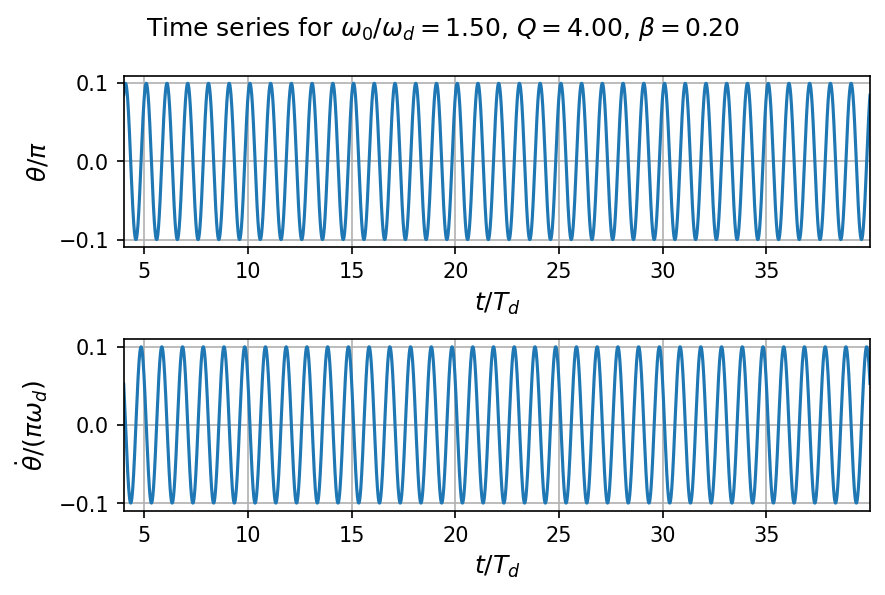

In [125]:
plot_TS_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=4.)

So, there is a transient at the beginning.
It is short-ish because we have quite a bit of damping: $Q=4$, technically in the weakly-damped regime, but low enough that a free oscillation decays after a only handful of oscillations.
Setting `tmin=4` ($t_{min} = 4\tau$ in seconds) in the time series should crop this initial transient and leave only the steady regime, and `t_min=35` should display only the last 5 driving periods. (I have not implemented this for the phase plot, I like seeing the transient there)

In [126]:
def plot_phase_ddp(th, dth, wd, w0, b, g, t, ftsz, nconts):
    """ draw phase plot; th is theta, dth is dtheta/dt, nconts is number of contours for U """
    # First, we plot the potential energy in the background
    thm = min(min(th)/pi, -1)  # lower x limit; 
    thM = max(max(th)/pi, +1)  # upper x-limit
    dthM = 1.1*max(abs(dth))/pi/wd  # y-limit; symmetric around zero
    th_lin = np.linspace(thm, thM, 512)
    dth_lin = np.linspace(-dthM, dthM, 64)
    thg, dthg = np.meshgrid(th_lin*pi, dth_lin*pi*wd)
    Ug = 0.5 * dthg**2 + w0**2 * (1-np.cos(thg))  # not the right units; only want the shape
    plt.contourf(thg/pi, dthg/pi/wd, Ug, nconts, alpha=0.1)  # alpha controls transparency
    
    # Then we plot the phase trajectory
    # plt.plot(th/pi, dth/pi/wd, 'r.', markersize=2)
    plt.scatter(th/pi, dth/pi/wd, c=t, cmap='copper_r', s=1.0)  # c=t means color-coded by t; s is size
    plt.ylabel(r'$\dot\theta/(\pi\omega_d)$ [rad/s]')
    plt.xlabel(r'$\theta/\pi$')
    plt.title(r"$\phi$-plot for $\omega_0/\omega_d = {0:.2f}$, $Q = {1:.2f}$, $\beta = {2:.2f}$"
              .format(w0/wd, w0/g, b), fontsize=ftsz)
    # plt.axis(xmin=-1, xmax=1)
    plt.tight_layout()
    plt.show()
    return

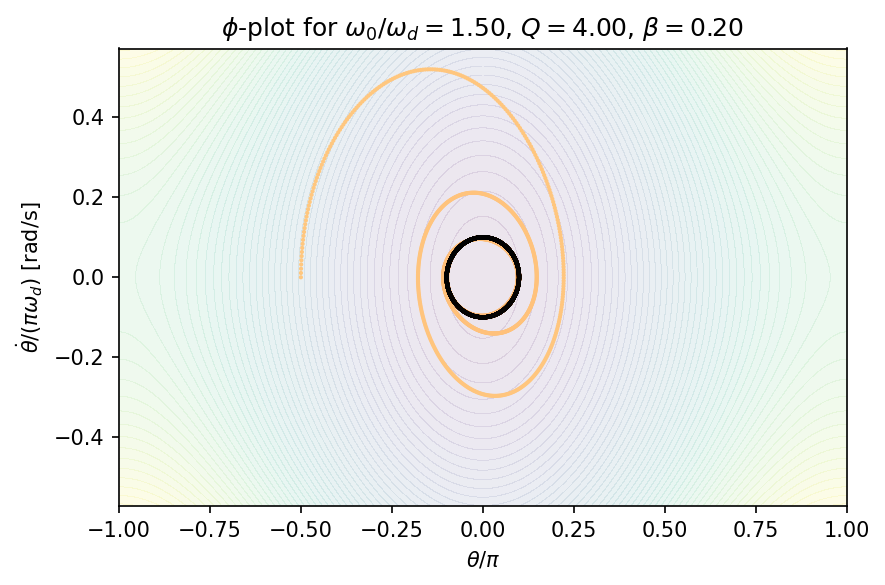

In [127]:
plot_phase_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=64)

After a while, we reach a steady-state in which our phase space shows only an ellipse-like trajectory (the light orange trajectory in the centre).
Note that the steady-state phase plot does not exactly follow iso-$U$ contours, the ellipse is slightly flatter: the pendulum gains energy when the the driving work is positive, loses energy when the driving work is negative and/or damping removes energy.
We therefore say that this system has an **attractor** (since the trajectory was attracted to this ellipse) and that in this case, the attractor is a *single-period cycle*.
That is, at this $\beta$, after every period, the motion completes 1 full ellipse.  

For the initial $\beta = 0.2$ rad ($\approx 11^\circ$), the forcing is very weak, and the oscillations are periodic with period $\tau$, as predicted by linear theory.
Let's check it on a Fourier plot.

In [128]:
def spectrum_ddp(th, wd, w0, b, g, t, tmin, ftsz):
    """ This one plots the spectrum. Best results will be achieved if
    tmin is as small as possible, but large enough that the transient
    is excluded. It should also be an integer number of periods for the
    function to be periodic. Otherwise, big wiggles. """
    
    th_for_Fourier = th[t>=tmin]
    An = 2*rfft(th_for_Fourier, norm='forward')
    # To make the Fourier plot interpretable, numpy.fft has a function to create
    # an x-axis made out of frequencies instead of mode numbers. See below. 
    w_array = np.fft.rfftfreq(len(th_for_Fourier), t[1]-t[0])*2*pi
    
    plt.semilogy(w_array/wd, abs(An), label='$A_n$')
    plt.xlabel('$\omega/\omega_d$', fontsize=ftsz)
    plt.ylabel('$|A_n|$', fontsize=ftsz)
    plt.title(r"Fourier coeffs for $\omega_0/\omega_d = {0:.2f}$, $Q = {1:.2f}$, $\beta = {2:.2f}$"
              .format(w0/wd, w0/g, b), fontsize=ftsz)
    plt.xlim(0., 10.)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    return

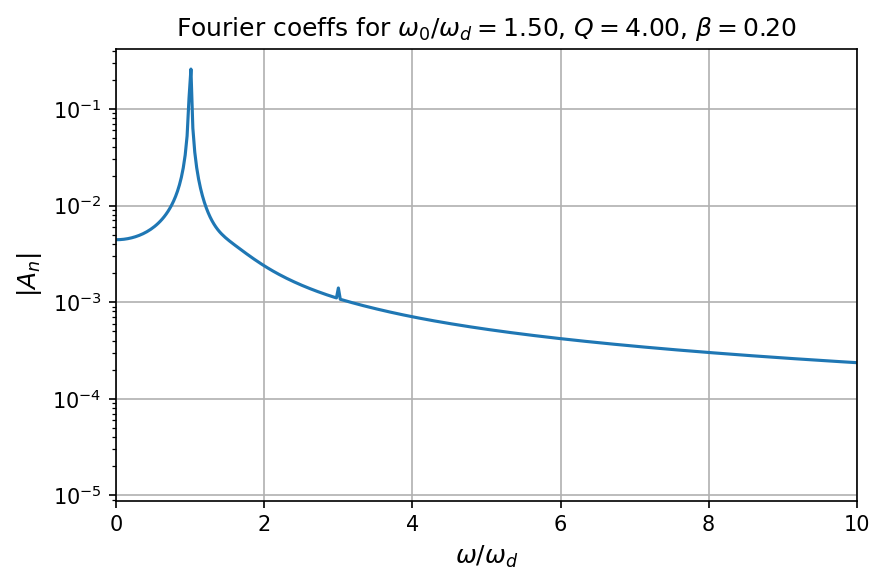

In [129]:
spectrum_ddp(theta, omegad, omega0, beta, gamma, time, 4., ftsz)

So, we see peaks at $\omega = \omega_d$, a tiny superharmonic at $3\omega_d$, but it's faint.

Let's crank it up! Push to $\beta = 0.9$.

In [130]:
beta = 0.9  # 52º
theta, dottheta = generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)

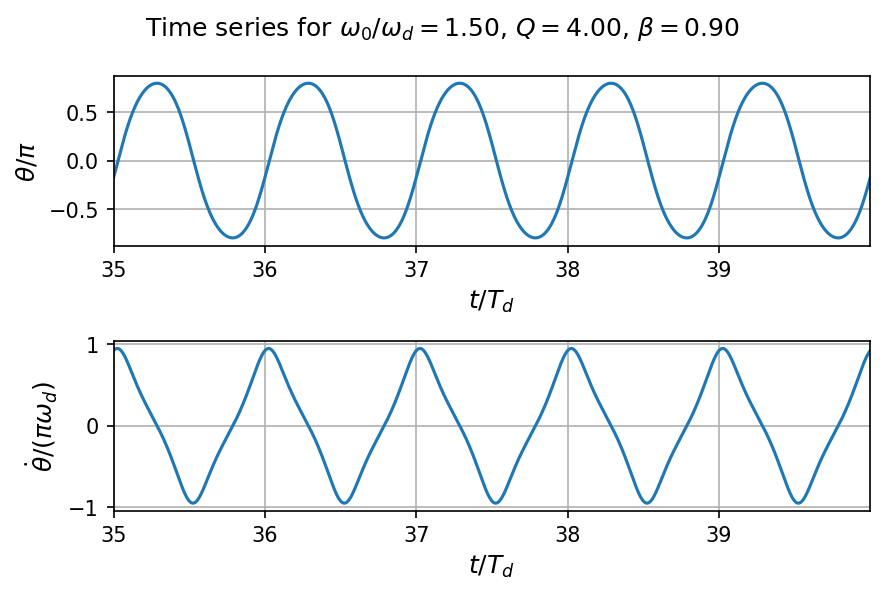

In [131]:
plot_TS_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=35.)

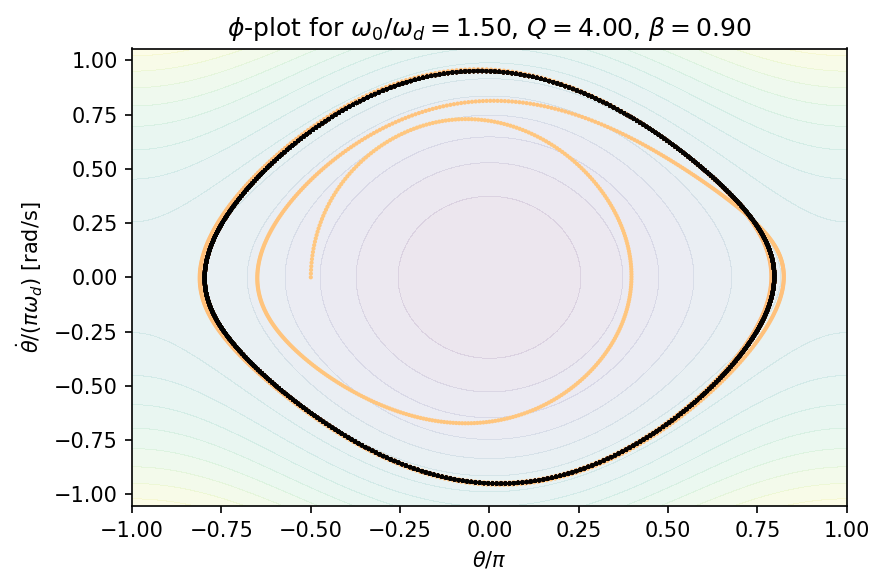

In [132]:
plot_phase_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=16)

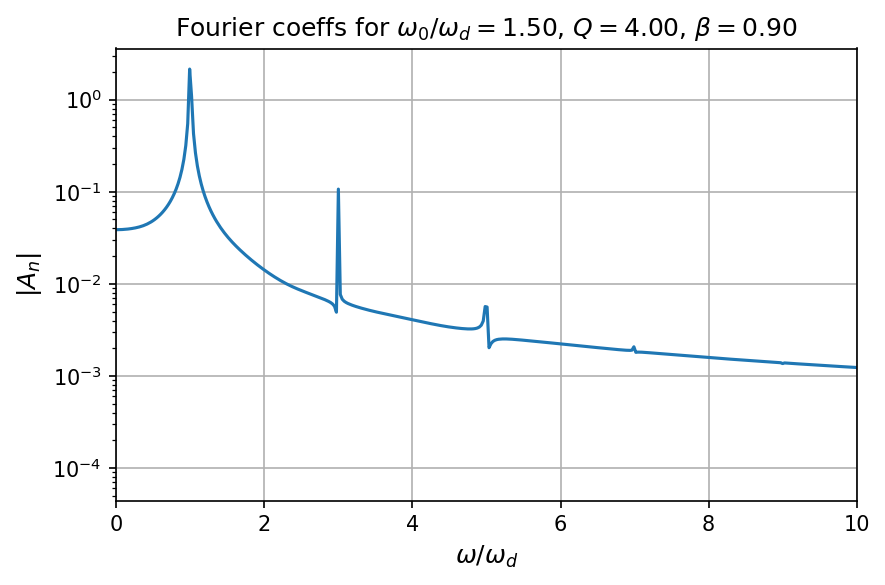

In [133]:
spectrum_ddp(theta, omegad, omega0, beta, gamma, time, 5., ftsz)

For $\beta = 0.9$, the amplitude is much larger, we might be detecting a flattening of the tops, confirmed by the appearance of the superharmonics at $\omega = 3\omega_d$, $5\omega_d$, $7\omega_d$ and maybe (just maybe) $9\omega_d$.
The phase plot still shows a single-period attractor, but this time it is clearly not an ellipse.
Squinting hard, we can identify the parts of the cycle where the forcing give energy to the system (that is, when the trajectory climbs the contours) and parts of the cycle where the system loses energy (when the trajectory goes down).

The amplitude is close to $\pi$: we're close to the pendulum going over the top.
Let's crank it up once more...

In [134]:
beta = 1.2  # 69º
theta, dottheta = generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)

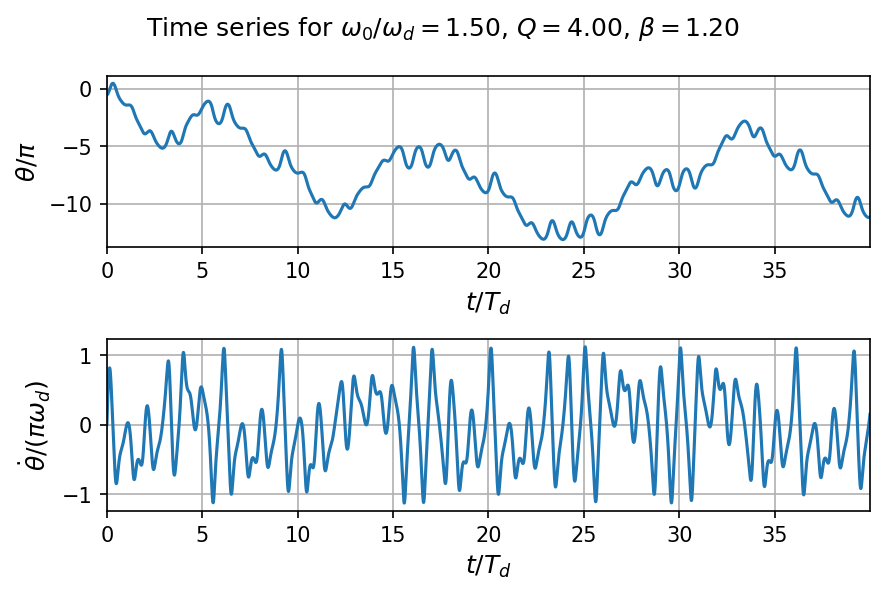

In [135]:
plot_TS_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=0.)

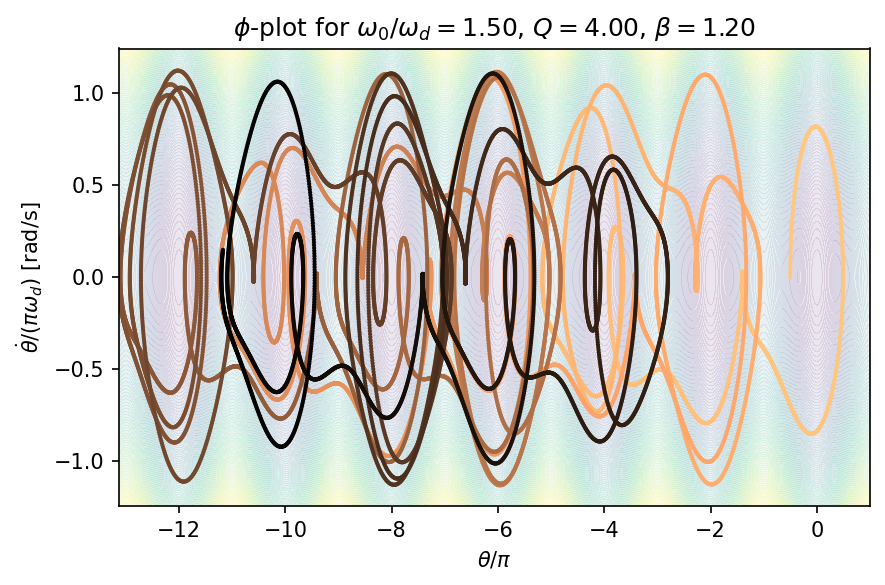

In [136]:
plot_phase_ddp(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=128)

Weee! The pendulum goes over the top, often.
Also, the signal is not periodic anymore: this is a signature of chaos.
The phase plot shows it quite remarkably, with the phase trajectory never settling into a closed trajectory.

Let me pause for a sec and comment on the fact that the pendulum goes over the top sometimes, and how the phase plot is moderately useful like this.
With the particular set of parameters I used ($\omega_d$, $\omega_0$, $\gamma$, $\beta$), the phase plot becomes very long.
Right now, it's OK: it goes over but stays in each potential well for a while, so, the plot is still readable.
But with more driving, the pendulum could undergo rolling motion.
And if it did, the plots in phase space could look kind of wild, with the angle jumping from potential well to potential well along the $\theta$ axis, making the phase plot very wide and details hard to read.
We therefore make the phase plot "periodic": if $\theta$ tries to "escape" on the left because it is doing a barrel roll clockwise, we make it re-enter the central potential well from the right.

In [137]:
def wrap_theta(th):
    """ map all theta values onto the branch -pi<theta<pi """
    th_wrapped = th[:] % (2*pi)  # First, move everything between [0, 2*pi]
    for i in range(len(th)):  # second, move everything between [pi, 2*pi] in [-pi, 0]
        if th_wrapped[i] > pi:
            th_wrapped[i] = th_wrapped[i] - 2*pi
    return th_wrapped

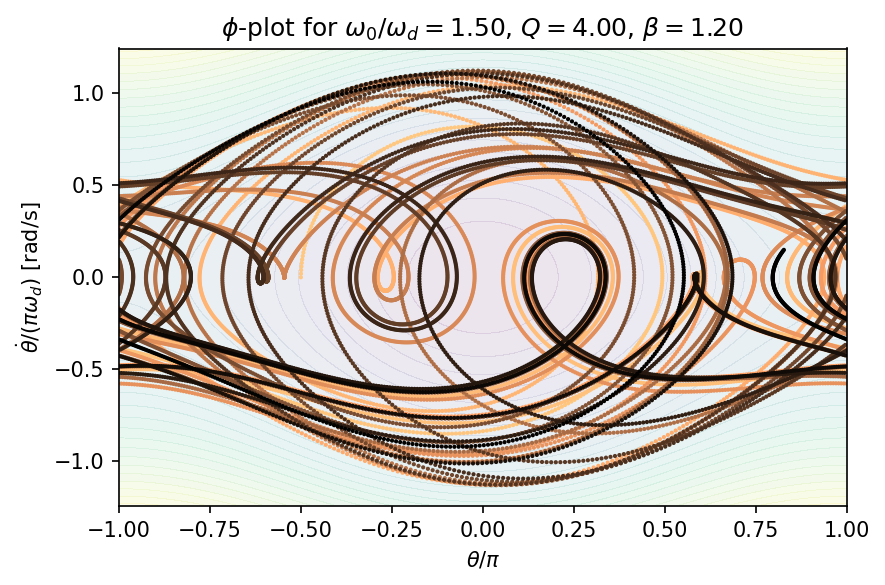

In [138]:
theta_wrapped = wrap_theta(theta)
plot_phase_ddp(theta_wrapped, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=32)

That's better.

Periodicity is now hard to see. What is the Fourier spectrum saying?

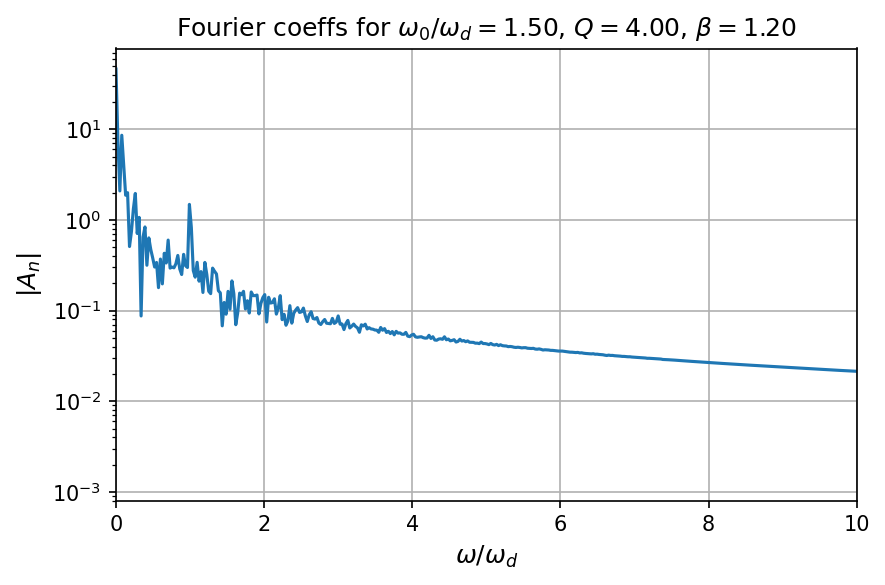

In [139]:
spectrum_ddp(theta, omegad, omega0, beta, gamma, time, 5., ftsz)

So, the periodicity due to the driving is still there.
But besides that, it's a mess of frequencies: there are plenty of superharmonics, and they are not multiple of $\omega_d$.
But there are also *subharmonics*: frequencies that are less than $\omega$.
In fact, the lower-frequency signals appear more important, indicating that long-term motions (the drift from potential well to potential well each time the pendulum does a barrel roll is such an example).

We just witnessed the appearance of chaos: a very unpredictable dynamics, where periodicity gave way to all sorts of frequencies. Let me now go beyond this illustration and talk about chaos in a more systematic way.